#  Time Series Analysis and Modelling with Python (Beginner)

### Time Series Forecasting is basically the machine learning modeling for Time Series data (years, days, hours…etc.)for predicting future values using Time Series modeling

The plan of the notebook is to familirize the Beginners with Time Series Analysis in Python. I have included all the essential things required for a beginner to start with Time Series!

Later we will attempt other different approaches to forecast a Time Series and Compare Various Models

### Problem Statement
Analyse and Forecast Time Series data of US Air Passengers

#### predict the Number of Air passengers per month 

This dataset provides monthly totals of a US airline passengers from 1949 to 1960. This dataset is taken from an inbuilt dataset of R called AirPassengers. We will use this data to forecast the future values and help the business.

In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Import the Libraries that we will be using

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import math

## Data Visualization
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
%matplotlib inline

# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm  

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
%matplotlib inline

# For marchine Learning Approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


from datetime import datetime
import pandas.core.tools.datetimes as datetools
import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the Dataset
# Importing the training set
dataset= pd.read_csv('AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [181]:
dataset.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
dataset.dtypes

Month          object
#Passengers     int64
dtype: object

### Convert type of column 'Month' from 'object' to 'datetime

In [5]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

### Convert column 'Month' as index

In [6]:
indexedData = dataset.set_index('Month')
indexedData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 1. Checking for Stationarity of the Air Passengers Dataset

A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time and an autocovariance that does not depend on time.

The basic assumption before applying stochastic models is that the time series should be stationary.

### Plotting the Indexed Data (Date vs Number of passengers)

Text(0.5, 1.0, 'International Airline Passenger')

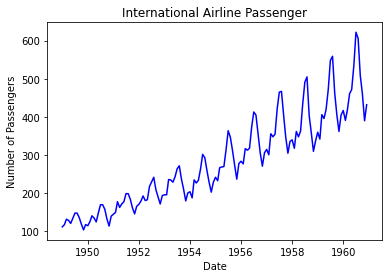

In [7]:
plt.plot(indexedData, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title("International Airline Passenger")

Text(0.5, 1.0, 'International Airline Passenger')

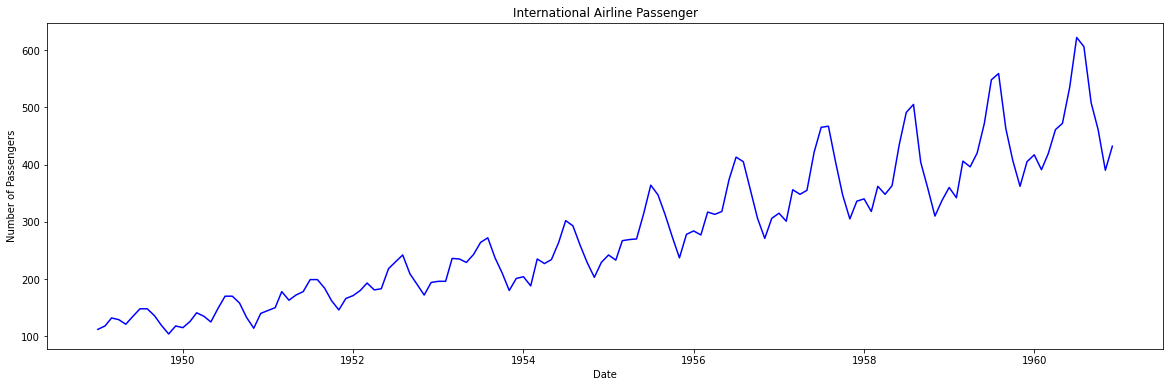

In [9]:
rcParams['figure.figsize'] = 20, 6
plt.plot(indexedData, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title("International Airline Passenger")

In [16]:
import matplotlib.ticker as plticker

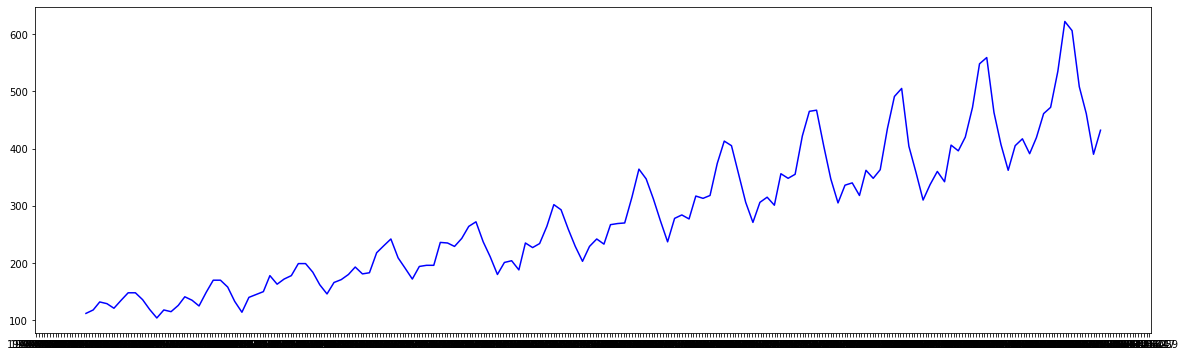

In [20]:

fig, ax = plt.subplots()
ax.plot(indexedData, color='blue')
loc = plticker.MultipleLocator(base=12.0) # this locator puts ticks at regular intervals, here we want yearly
ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_minor_locator(None)


We can clearly observe seasonality and positive trend in the above graph.

The trend is increasing. The mean is not constant.

So, our first goal is to make the time series into stationary.

<AxesSubplot:ylabel='Density'>

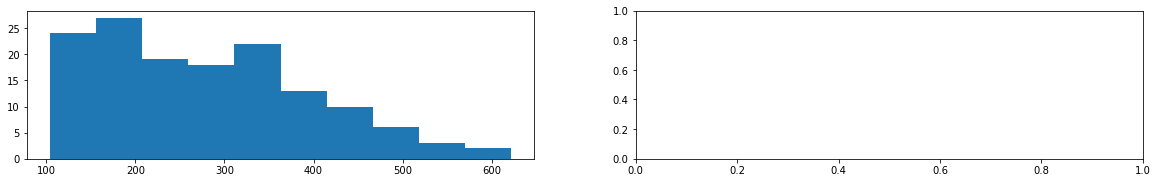

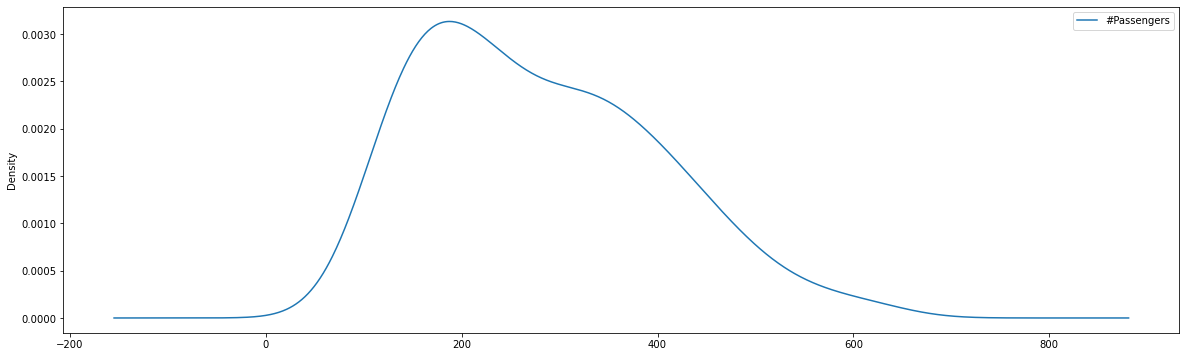

In [22]:
plt.subplot(221)
plt.hist(indexedData)
plt.subplot(222)
indexedData.plot(kind = 'kde')

### Estimating & Eliminating Trend
We can clearly see that the there is a significant positive trend. So we can apply transformation which will penalize higher values more than smaller values. 

These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity.

#### Taking a Log Transformation for Simplicity

Apply log transform on the indexed_data to penalize higher values more than the smaller values: This can be a log, square root, cube root, etc. Lets take a log transform here for simplicity.

In [14]:
#let's take a log transform for simplicity:
indexedData_logScale= np.log(indexedData)

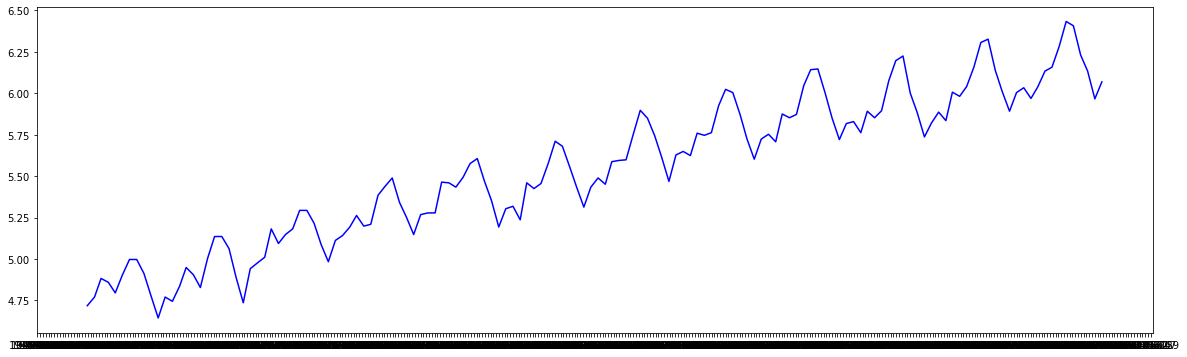

In [15]:
fig, ax = plt.subplots()
ax.plot(indexedData_logScale, color='blue')
loc = plticker.MultipleLocator(base=12.0) # this locator puts ticks at regular intervals, here we want yearly
ax.xaxis.set_major_locator(loc)

##### Trend remains same. The values of the y-axis got changed.

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

Aggregation – taking average for a time period like monthly /weekly averages

Smoothing – taking the rolling averages

Polynomial Fitting – fitting a regression model


##### We will apply Smoothing in this Challenge  here.: Taking the Rolling Averages

## Moving Average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. 

Here, We will take the average for 4, 6, 8 and 13 months: Pandas has specific functions defined for determining rolling statistics.

#### Next step is to find seasonality (s).

Let's plot Moving average for 4, 6, 8 and 12 months.

###  Plotting the 4- Months Moving Average

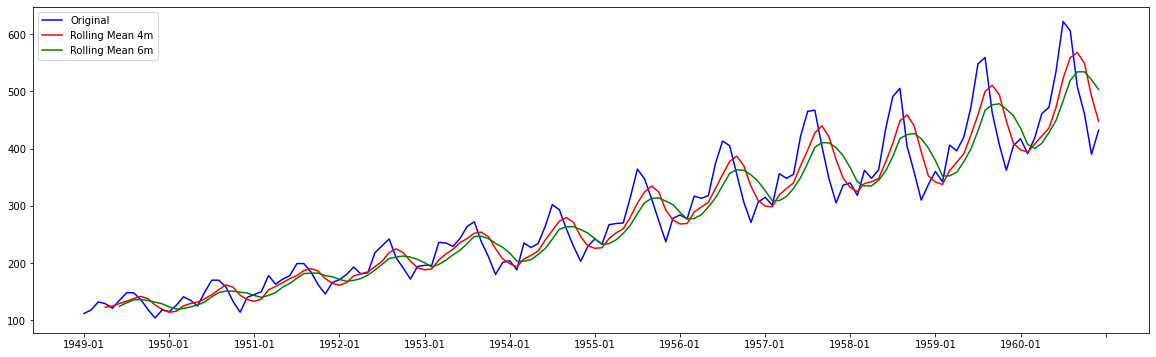

In [28]:
fig, ax = plt.subplots()
four_months_moving_average = indexedData.rolling(window=4).mean()
six_months_moving_average = indexedData.rolling(window=6).mean()
ax.plot(indexedData, color='blue', label='Original')
ax.plot(four_months_moving_average, color='red', label='Rolling Mean 4m')
ax.plot(six_months_moving_average, color='green', label='Rolling Mean 6m')
ax.legend(loc='best')
# ax.title('4 Months Moving Average')

loc = plticker.MultipleLocator(base=12.0) # this locator puts ticks at regular intervals, here we want yearly
ax.xaxis.set_major_locator(loc)


###  Plotting the 6-Months Moving Average

Text(0.5, 1.0, '6 Months Moving Average')

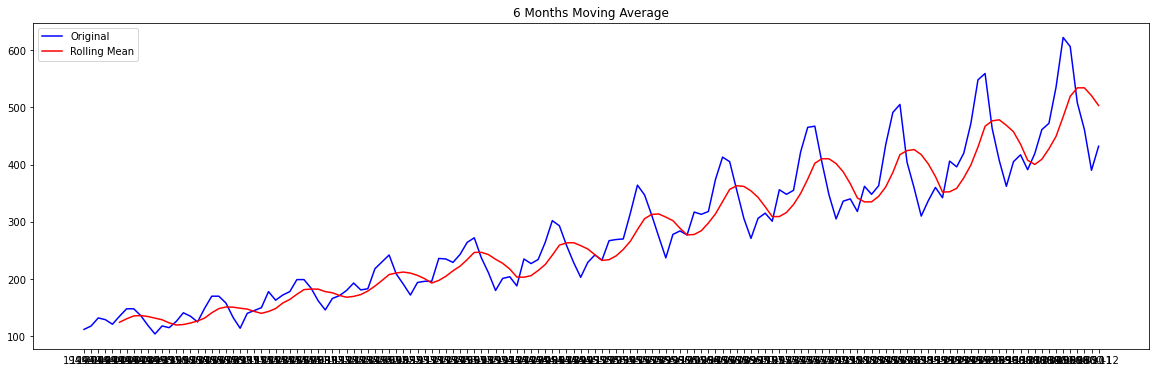

In [29]:
six_months_moving_average = indexedData.rolling(window=6).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

###  Plotting the 8-Months Moving Average

Text(0.5, 1.0, '8 Months Moving Average')

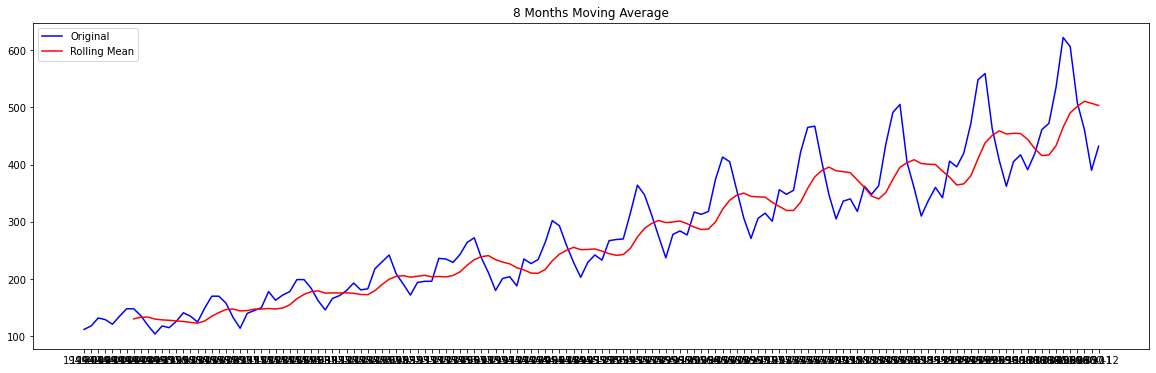

In [30]:
eight_months_moving_average = indexedData.rolling(window=8).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')

### Plotting the 12-Months Moving Average

Text(0.5, 1.0, '12 Months Moving Average')

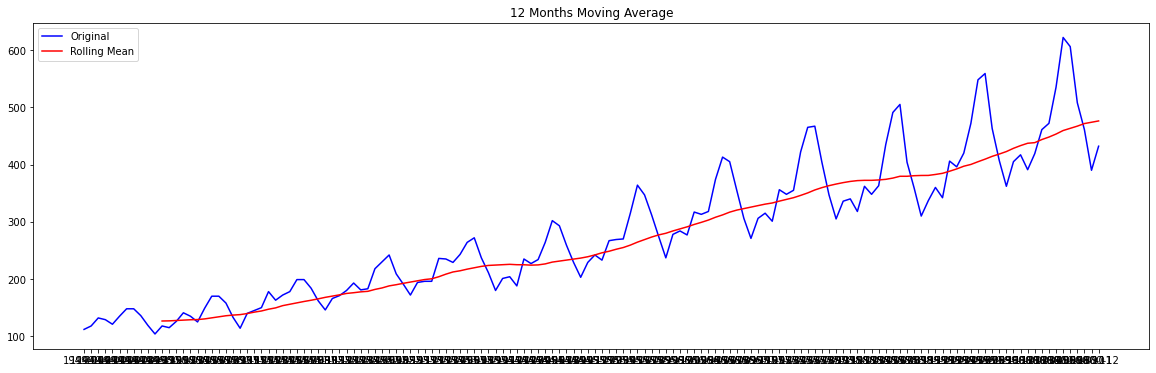

In [31]:
twelve_months_moving_average = indexedData.rolling(window=12).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

As we observe the above four moving averages, the moving average with window '12' is smooth compared to others. So, we can confirm that the seasonality(s) is 12.

### There are two tests to check whether a time series is stationary or not.

Rolling statistics (Visual test)

Dickey Fuller test

### Rolling statistics - A visual test

From the above observations, we can chose 's' as 12. (s=12)

In [32]:
rolmean = indexedData.rolling(window=12).mean()

Text(0.5, 1.0, 'Mean')

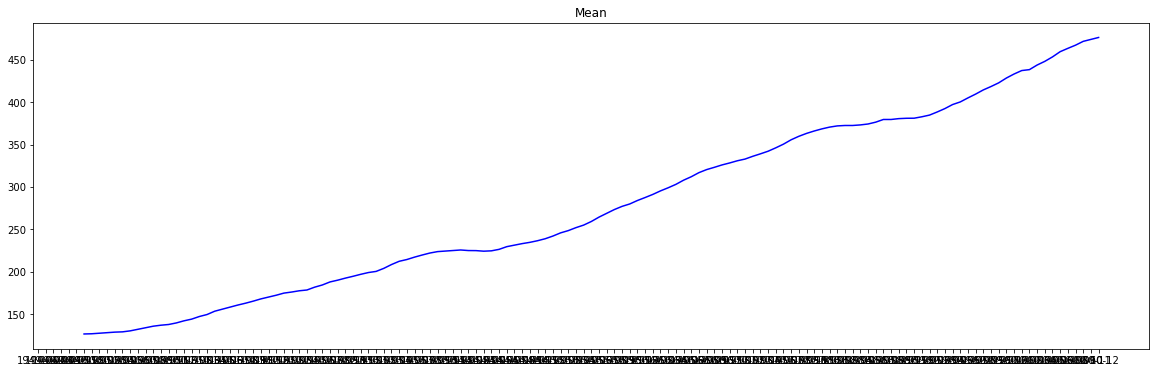

In [33]:
plt.plot(rolmean, 'blue')
plt.title('Mean')

In [34]:
rolstd = indexedData.rolling(window=12).std()

Text(0.5, 1.0, 'Standard Deviation')

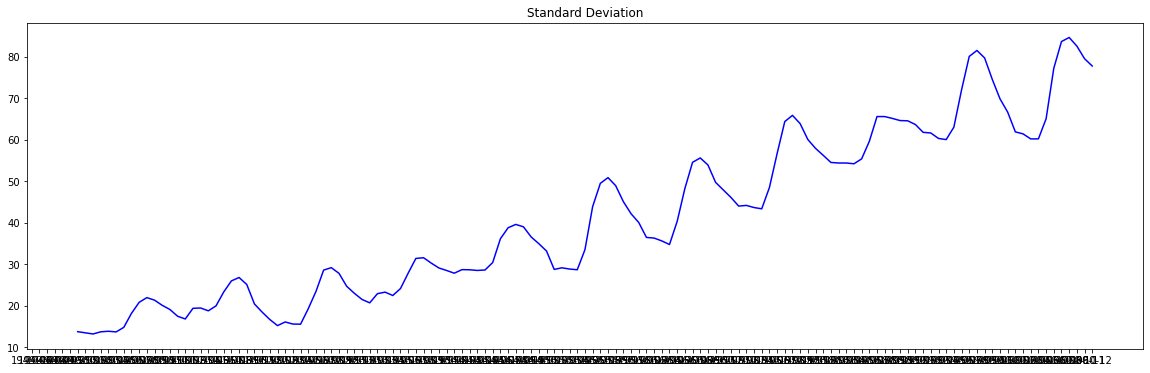

In [35]:
plt.plot(rolstd, 'blue')
plt.title('Standard Deviation')

As the data is at monthly level (12), we used window as 12. So, we get 'NaN' for the first 11 months.

### Plotting the Rolling Statistics

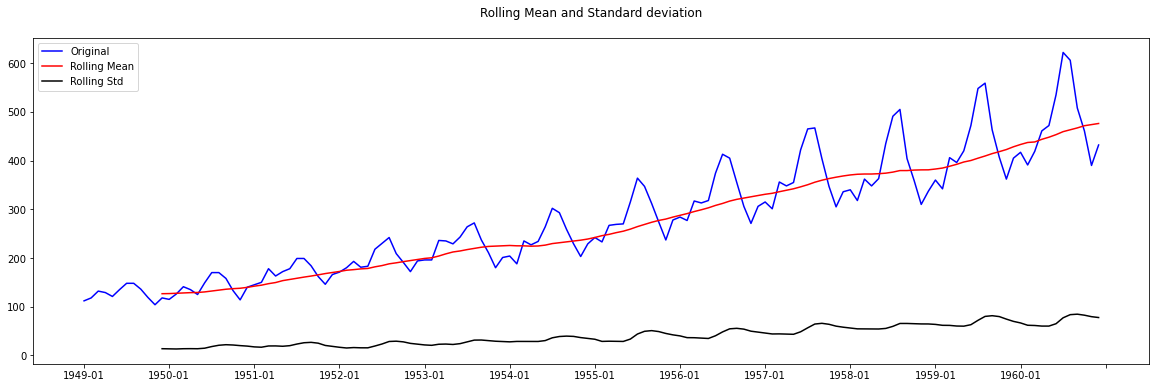

In [40]:
fig, ax = plt.subplots()


ax.plot(indexedData, color='blue', label='Original')
ax.plot(rolmean, color='red', label='Rolling Mean')
ax.plot(rolstd, color='black', label='Rolling Std')

ax.legend(loc='best')
ax.set_title('Rolling Mean and Standard deviation\n')
loc = plticker.MultipleLocator(base=12.0) # this locator puts ticks at regular intervals, here we want yearly
ax.xaxis.set_major_locator(loc)


As we can see, mean and standard deviation are not stationary. So, the time seires is not stationary.

### Dickey Fuller Test to Verify that the Time Series is Non-Stationary
Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the Time Series is non-stationary.

In [41]:
dftest = adfuller(indexedData['#Passengers'], autolag='AIC')

In [42]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

In [43]:
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

The p-value is very high. It should be very less. We fail to reject the null hypothesis as p-value is high. So, the time series is non-stationary.

#### If p-value is less, then we can say that the time series is stationary.

Standard deviation has very less variation but mean is increasing continously. Hence, it's not a stationary series. Also, the test statistic is way more than the critical values (compare signed values and not the absolute values).

### Function to perform both Tests ( Rolling Statistics Test along with the Dickey Fullers Test)
Let's write a function to perform both the tests for us at a time.

We’ll be using the Rolling statistics plots along with Dickey-Fuller test results a lot so I have defined a function which takesthe IndexedData as input and generated them for us. Please note that I’ve plotted standard deviation instead of variance to keep the unit similar to mean

In [49]:
def test_stationary(timeseries):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    fig, ax = plt.subplots()
    # Plot rolling statistics
    # plt.plot(timeseries, color='blue', label='Original')
    # plt.plot(movingAverage, color='red', label='Rolling Mean')
    # plt.plot(movingSTD, color='black', label='Rolling Std')
    # plt.legend(loc='best')
    # plt.title('Rolling Mean & Standard Deviation\n')
    # plt.show(block=False)
    ax.plot(timeseries, color='blue', label='Original')
    ax.plot(movingAverage, color='red', label='Rolling Mean')
    ax.plot(movingSTD, color='black', label='Rolling Std')
    ax.set_title('Rolling Mean & Standard Deviation\n')
    ax.legend(loc="best")
    ax.set_title('Rolling Mean and Standard deviation\n')
    loc = plticker.MultipleLocator(base=12.0) # this locator puts ticks at regular intervals, here we want yearly
    ax.xaxis.set_major_locator(loc)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

Results of Dickey Fuller Test:

Test Statistic                   0.815369
p-value                          0.991880
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


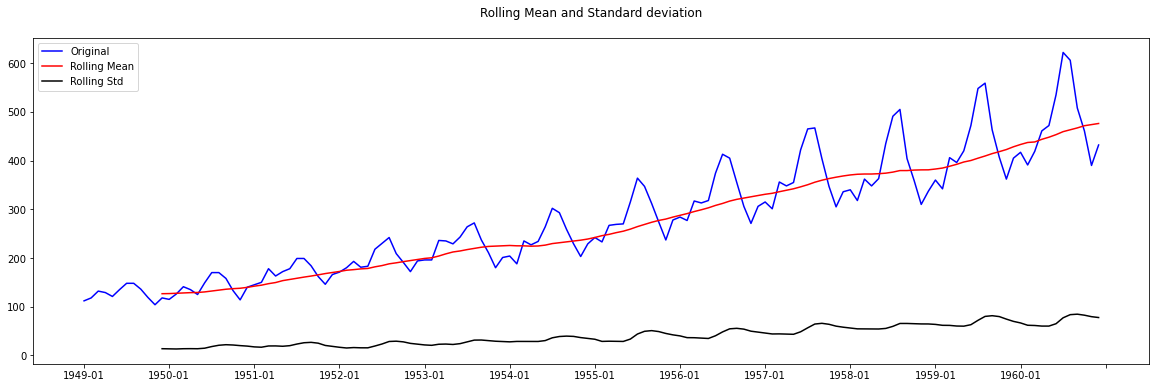

In [50]:
test_stationary(indexedData)

Standard deviation has very less variation but mean is increasing continously. Hence, it's not a stationary series. Also, the test statistic is way more than the critical values (compare signed values and not the absolute values).

Choosing the critical value at 0.05, we observe that in the above conducted Dickey-Fuller test for checking if the time series is stationary. This indicates mathematically that the time series is not stationary

## 2. Making the Series Stationary

Its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

### There are  2 Major Reasons behind the Non-Stationaurity of a Time Series:

Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.

Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. 

Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

### Transformations to Make the the Time Series Stationary 

In [51]:
movingAverage = indexedData_logScale.rolling(window=12).mean()
movingSTD = indexedData_logScale.rolling(window=12).std()

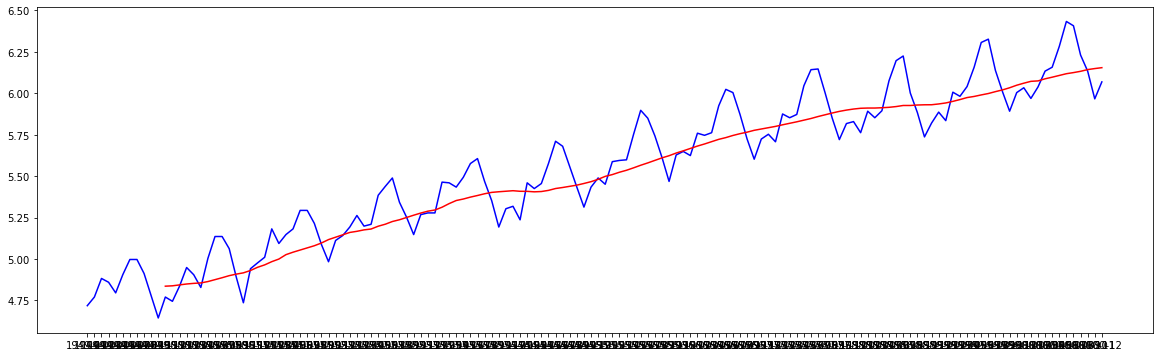

In [52]:
plt.plot(indexedData_logScale, color='blue')
plt.plot(movingAverage, color='red')

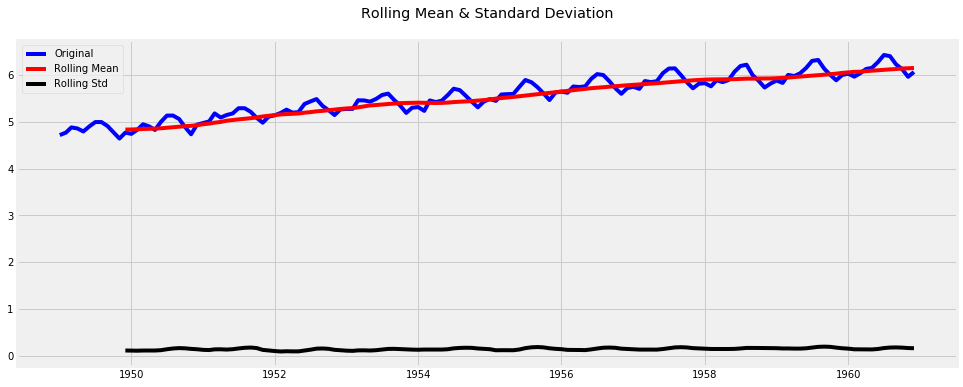

Results of Dickey Fuller Test:

Test Statistic                  -1.717017
p-value                          0.422367
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [208]:
test_stationary(indexedData_logScale)

The time series is not stationary. We can tell just by seeing the above graph. The mean is not constant.

### Lets Try Another transformation

In [53]:
dataLogScaleMinusMovingAverage = indexedData_logScale - movingAverage
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head()

,#Passengers
Month,
1949-12,-0.065494
1950-01,-0.093449
1950-02,-0.007566
1950-03,0.099416
1950-04,0.052142


Results of Dickey Fuller Test:

Test Statistic                  -3.162908
p-value                          0.022235
No. of Lags used                13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


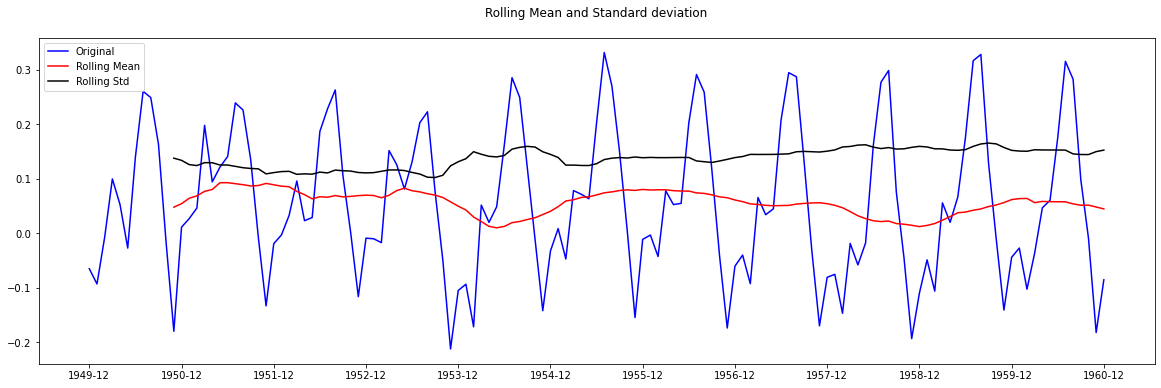

In [54]:
test_stationary(dataLogScaleMinusMovingAverage)

As p-value is less, null hypothesis is rejected. So, it is stationary.

### Lets Try Another transformation

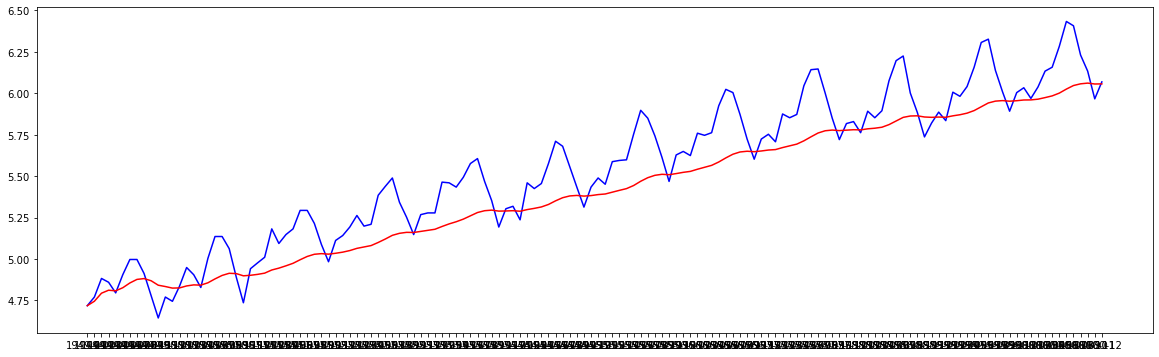

In [55]:
exponentialDecayWeightedAverage = indexedData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedData_logScale, 'blue')
plt.plot(exponentialDecayWeightedAverage, 'red')

Results of Dickey Fuller Test:

Test Statistic                  -3.601262
p-value                          0.005737
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


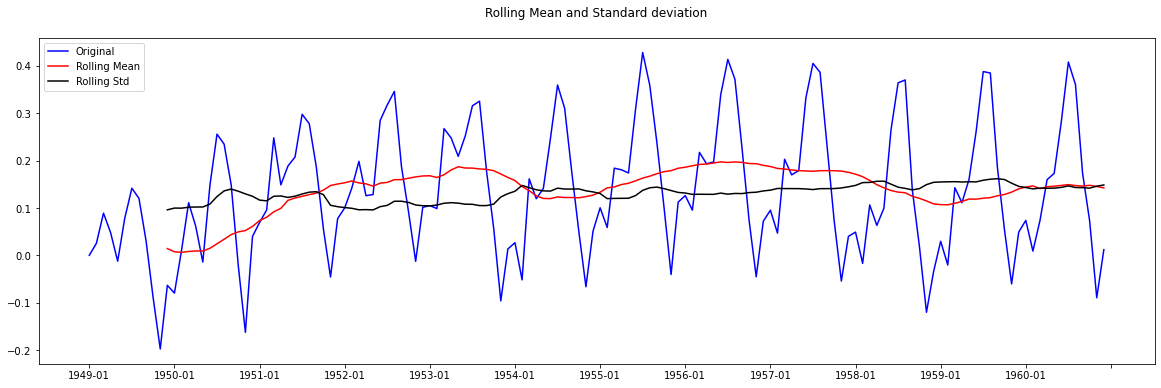

In [56]:
dataLogScaleMinusMovingExponentialDecayAverage = indexedData_logScale - exponentialDecayWeightedAverage
test_stationary(dataLogScaleMinusMovingExponentialDecayAverage)

As p-value is less, null hypothesis is rejected. So, it is stationary.

We can see from the above test result that p-value is lesser than 0.05 and the test statistic is greater than the critical value at 5%. We can thus decisively conclude that the time series is now stationary

This Time Series has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case.

### Two Methods of Eliminating Trend and Seasonality

Differencing  (taking the difference with a particular time lag)

Decomposition (modeling both trend and seasonality and removing them from the model)

### Differencing the Time Series to make it Stationary 
Let's difference the log transformed data.

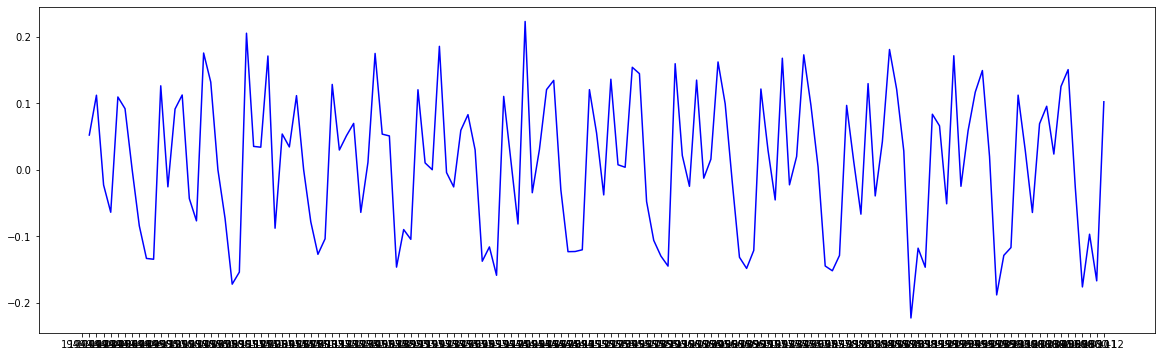

In [57]:
dataLogDiffShifting = indexedData_logScale - indexedData_logScale.shift()
plt.plot(dataLogDiffShifting, color='blue')

In [59]:
dataLogDiffShifting.dropna(inplace=True)

Results of Dickey Fuller Test:

Test Statistic                  -2.717131
p-value                          0.071121
No. of Lags used                14.000000
Number of observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


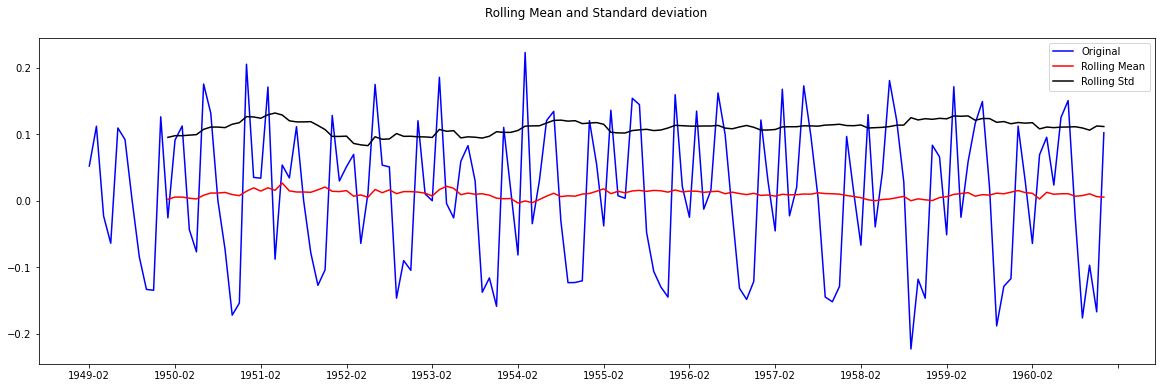

In [60]:
test_stationary(dataLogDiffShifting)

Null hypothesis is rejected. Therefore, the time series is stationary now after differencing once.


We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications.

## Decomposition

In [63]:
# https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be
# decomposition = seasonal_decompose(indexedData_logScale)
decomposition = seasonal_decompose(indexedData_logScale, model='multiplicative', period=1)


In [66]:
# Just for reference
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend[:5], seasonal[:5], residual[:5]

(Month
 1949-01    4.718499
 1949-02    4.770685
 1949-03    4.882802
 1949-04    4.859812
 1949-05    4.795791
 Name: trend, dtype: float64,
 Month
 1949-01    1.0
 1949-02    1.0
 1949-03    1.0
 1949-04    1.0
 1949-05    1.0
 Name: seasonal, dtype: float64,
 Month
 1949-01    1.0
 1949-02    1.0
 1949-03    1.0
 1949-04    1.0
 1949-05    1.0
 Name: resid, dtype: float64)

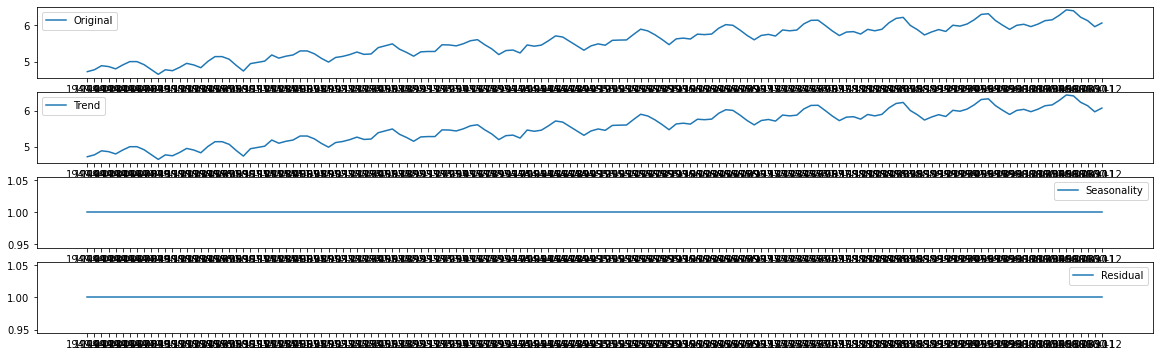

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedData_logScale, model='multiplicative', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedData_logScale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

Results of Dickey Fuller Test:



ValueError: sample size is too short to use selected regression component

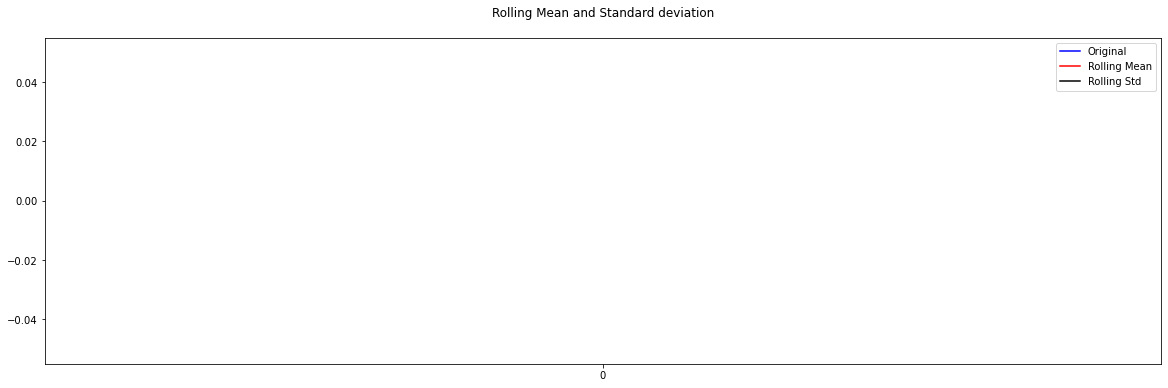

In [76]:
decomposedLogData = pd.DataFrame(residual, columns=["#Passengers"])
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this time series is very close to stationary.

## 4. Forecasting a Time Series 

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

1.Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

2.Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

3.Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers.

1.Autocorrelation Function (ACF): It is a measure of the correlation between the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

2.Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

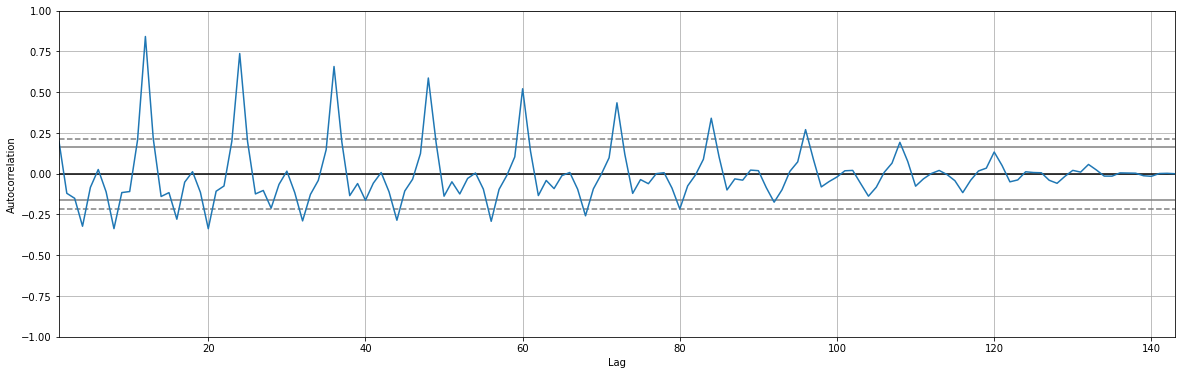

In [77]:
#ACF plot
pd.plotting.autocorrelation_plot(dataLogDiffShifting)

Due to seasonality, at lag 12 autocorrelation is high and for every multiple of 12, autocorrelation will be high but will keep decreasing moving further.

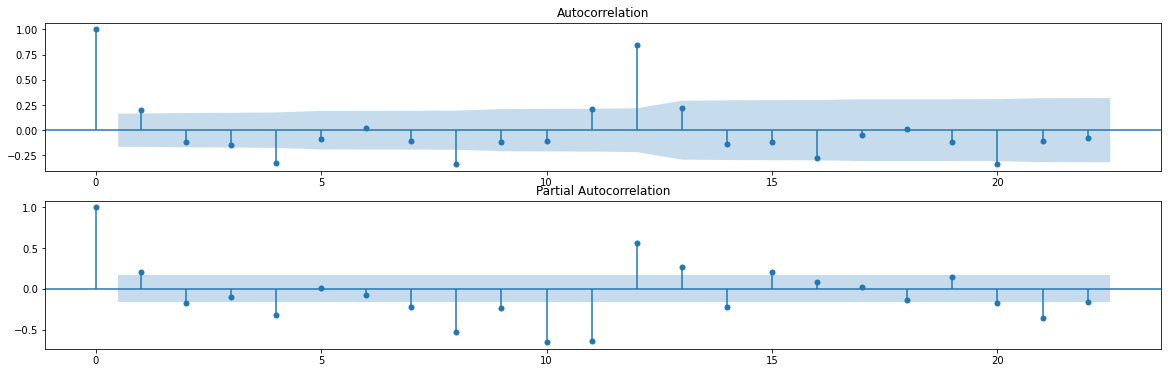

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot(211)
plot_acf(dataLogDiffShifting, ax=plt.gca())
plt.subplot(212)
plot_pacf(dataLogDiffShifting, ax=plt.gca())
plt.show()

In [79]:
#Another method
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dataLogDiffShifting, nlags=20)
lag_pacf = pacf(dataLogDiffShifting, nlags=20, method='ols')

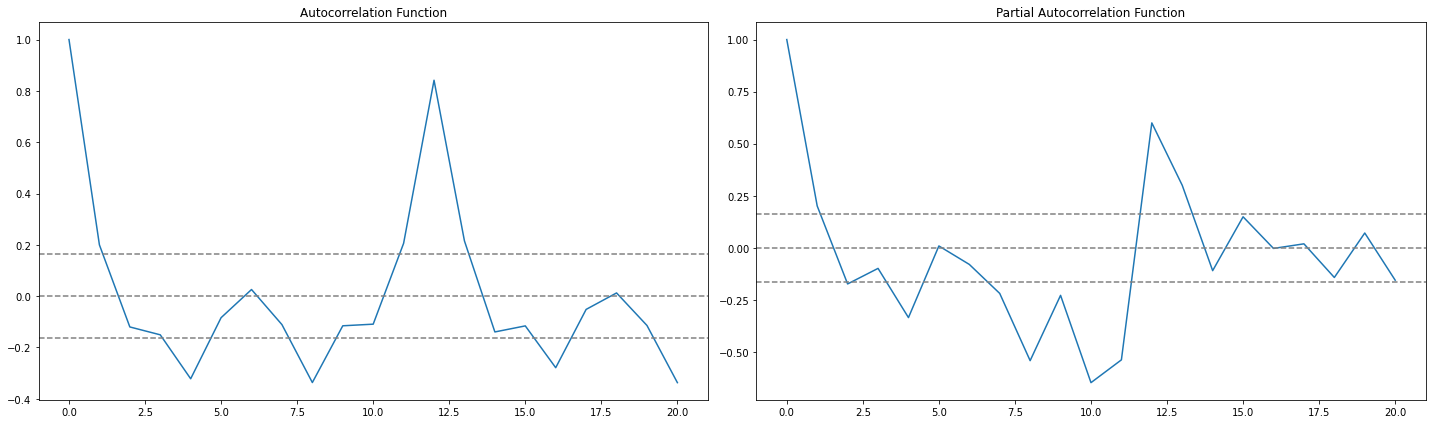

In [80]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time (p=2).

q – The lag value where the ACF chart crosses the upper confidence interval for the first time(q=2).

Now, lets make 3 different ARIMA models considering individual as well as combined effects. We will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

We need to load the ARIMA model first:

## Another way to Visualize and plot the ACF and PACF plots

While fitting an arima model, we need to find correct 'p', 'd' and 'q'.

We find 'd' by differencing the data number of times till it becomes stationary.

ACF and PACF plots are very useful in determining the values of p and q.

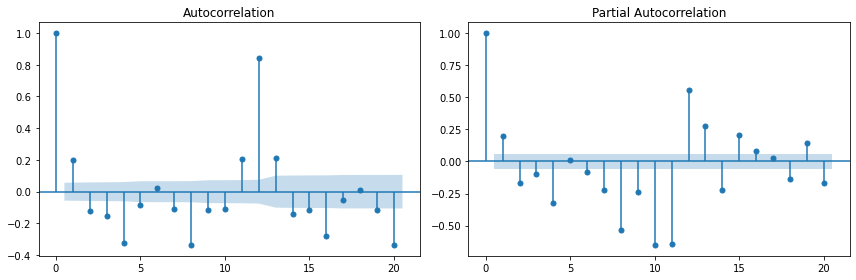

In [81]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(dataLogDiffShifting, lags=20, ax=axes[0], alpha=0.5)
plot_pacf(dataLogDiffShifting, lags=20, ax=axes[1], alpha=0.5)
plt.tight_layout()

The lag value where the PACF graph crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

The lag value where the ACF graph crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

#### Let's fit ARIMA model with (2,1,2)
p = 2, d = 1, q = 2

Plotting the ARIMA model


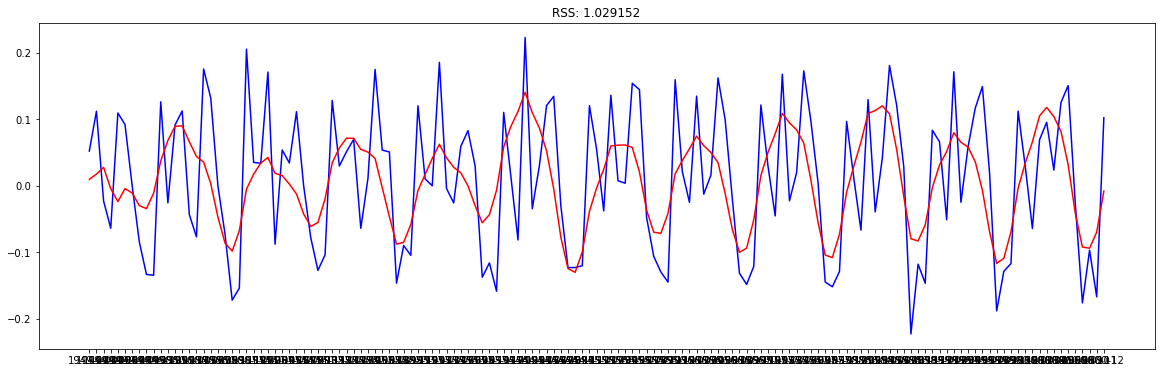

In [82]:
model = ARIMA(indexedData_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataLogDiffShifting, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues - dataLogDiffShifting['#Passengers'])**2))
print('Plotting the ARIMA model')

### ARIMA model with (2,1,0)

p = 2, d = 1, q = 0

Plotting the ARIMA model


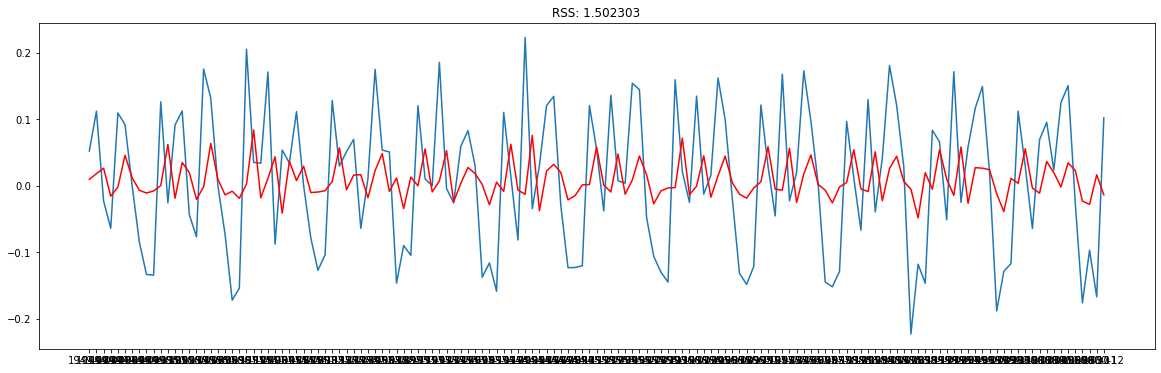

In [83]:
model = ARIMA(indexedData_logScale, order=(2,1,0))
results_AR = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_AR.fittedvalues - dataLogDiffShifting['#Passengers'])**2))
print('Plotting the ARIMA model')

#### ARIMA model with (0,1,2)

p = 0, d = 1, q = 2

Plotting the ARIMA model


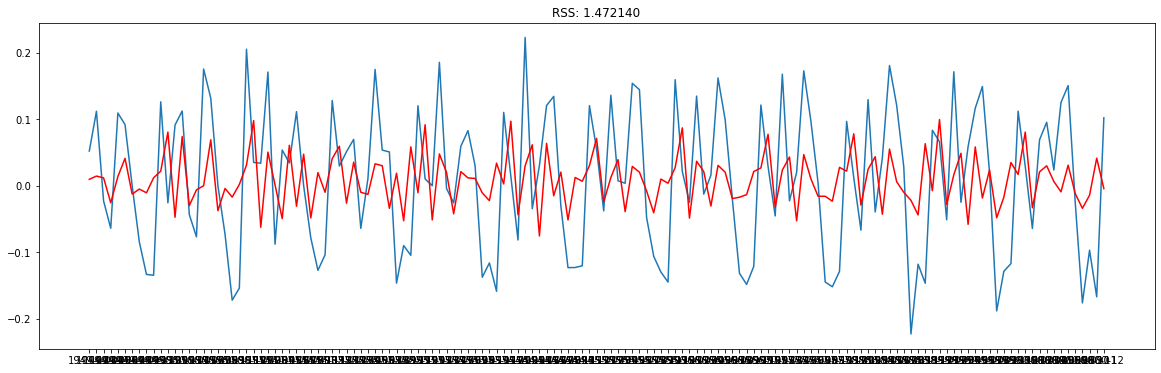

In [84]:
model = ARIMA(indexedData_logScale, order=(0,1,2))
results_MA = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_MA.fittedvalues - dataLogDiffShifting['#Passengers'])**2))
print('Plotting the ARIMA model')

In [85]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()


Month
1949-02    0.009580
1949-03    0.017491
1949-04    0.027670
1949-05   -0.004521
1949-06   -0.023890
dtype: float64

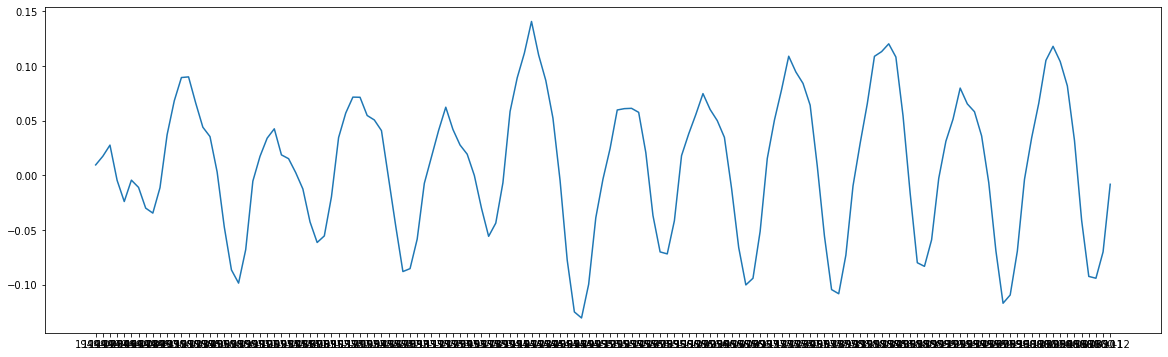

In [86]:
plt.plot(predictions_ARIMA_diff)

As we compare the above models, the model with parameters (2,1,2) has less RSS score.

#### Taking it Back to original scale

The way to convert the differencing to log scale is to add these differences consecutively to the base number.

In [87]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02    0.009580
1949-03    0.027071
1949-04    0.054742
1949-05    0.050221
1949-06    0.026331
dtype: float64

In [89]:
predictions_ARIMA_log = pd.Series(indexedData_logScale['#Passengers'].iloc[0], index=indexedData_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01    4.718499
1949-02    4.728079
1949-03    4.745570
1949-04    4.773241
1949-05    4.768720
dtype: float64

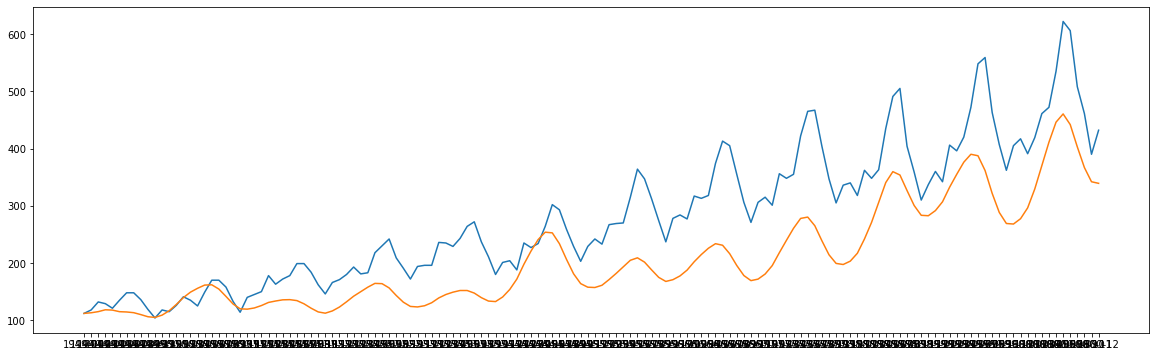

In [90]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedData)
plt.plot(predictions_ARIMA)

Root Mean Squared Error: 90.1050

There are many parameters we consider when Configuring and Tuning an ARIMA Model in Python with Statsmodels in Python.

https://machinelearningmastery.com/tune-arima-parameters-python/

### Time Series Analysis in Python – A Comprehensive Guide

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

### Time Series Forecasting with LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler